In [ ]:
import pandas as pd 
import math
df=pd.read_csv('/content/drive/MyDrive/MLDatasets/titanic/titanic_train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/MLDatasets/titanic/titanic_test.csv')
test_ids = test_df["PassengerId"]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')
test_df=test_df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
print(df["Age"].isna().sum())

177


In [ ]:
median_age=math.floor(df.Age.median())
df.Age=df.Age.fillna(median_age)
test_df.Age=test_df.Age.fillna(median_age)


In [ ]:
# df['Age'] = df['Age'].astype(int)
# test_df['Age'] = test_df['Age'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])
test_df["Embarked"]=le.fit_transform(test_df["Embarked"])

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2
5,0,3,male,28.0,0,0,8.4583,1
6,0,1,male,54.0,0,0,51.8625,2
7,0,3,male,2.0,3,1,21.0750,2
8,1,3,female,27.0,0,2,11.1333,2
9,1,2,female,14.0,1,0,30.0708,0


In [ ]:
inputs=df.drop('Survived',axis='columns')
target=df['Survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
inputs['Sex_New']=le_sex.fit_transform(inputs['Sex'])
test_df['Sex_New']=le_sex.fit_transform(test_df['Sex'])
inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_New
0,3,male,22.0,1,0,7.2500,2,1
1,1,female,38.0,1,0,71.2833,0,0
2,3,female,26.0,0,0,7.9250,2,0
3,1,female,35.0,1,0,53.1000,2,0
4,3,male,35.0,0,0,8.0500,2,1


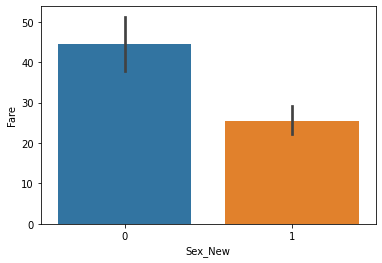

In [ ]:
import seaborn as sns
sns.barplot(x=inputs["Sex_New"],y=inputs["Fare"])

In [ ]:
inputs=inputs.drop('Sex',axis='columns')
test_df=test_df.drop('Sex',axis='columns')
inputs.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_New
0,3,22.0,1,0,7.2500,2,1
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,2,0
3,1,35.0,1,0,53.1000,2,0
4,3,35.0,0,0,8.0500,2,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model_rf.score(X_test,y_test)

0.8212290502793296

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(solver="lbfgs",max_iter=1000)
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.7821229050279329

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  
classifier.score(X_train, y_train)

0.7907303370786517

In [ ]:
test_df.fillna(X_train.mean(), inplace=True)

In [ ]:
subpred = model_rf.predict(test_df)
subpred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
temp_df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": subpred,
                  })
temp_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [ ]:
temp_df.to_csv("/content/drive/MyDrive/MLDatasets/titanic/submission_new4.csv", index=False)

# **Kaggle Titanic Survivor Dataset Submission:**

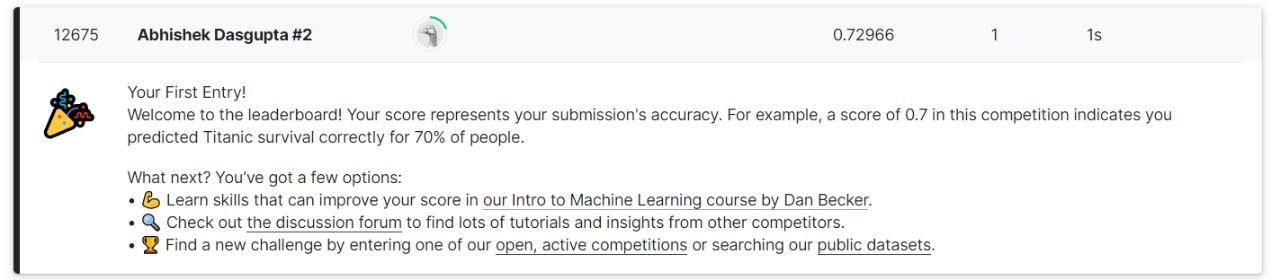